In [1]:
import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd()
data_files = glob.glob(os.path.join(path, "feature_selection_cleveland/output_selection"))

li = []
for filename in data_files:
    df = pd.read_csv(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

df = df[(df['selection_age'].notna()) & (df['feature_selection_frac'] != 1.0)]
df

,model,sample_size,is_binary,feature_selector,feature_selection_frac,selection_age,selection_sex,selection_cp,selection_trestbps,selection_chol,selection_fbs,selection_restecg,selection_thalach,selection_exang,selection_oldpeak,selection_slope,selection_ca,selection_thal
0,svm,0.05,True,rfe,0.4,0.18,0.46,0.58,0.10,0.06,0.16,0.46,0.10,0.44,0.64,0.48,0.58,0.76
1,svm,0.05,False,rfe,0.4,0.62,0.10,0.44,0.46,0.32,0.12,0.40,0.56,0.24,0.46,0.22,0.44,0.62
2,svm,0.05,True,rfe,0.7,0.66,0.78,0.90,0.42,0.20,0.60,0.94,0.44,0.74,0.76,0.76,0.84,0.96
3,svm,0.05,False,rfe,0.7,0.90,0.54,0.90,0.74,0.40,0.36,0.76,0.76,0.56,0.78,0.56,0.86,0.88
6,svm,0.10,True,rfe,0.4,0.02,0.34,0.60,0.00,0.00,0.50,0.24,0.02,0.68,0.52,0.54,0.80,0.74
7,svm,0.10,False,rfe,0.4,0.00,0.24,0.54,0.00,0.00,0.36,0.36,0.00,0.72,0.72,0.52,0.82,0.72
8,svm,0.10,True,rfe,0.7,0.42,0.88,0.92,0.24,0.02,0.78,0.92,0.18,0.98,0.86,0.96,0.94,0.90
9,svm,0.10,False,rfe,0.7,0.22,0.94,1.00,0.10,0.00,0.86,0.96,0.08,0.94,1.00,0.92,1.00,0.98
12,svm,0.20,True,rfe,0.4,0.00,0.64,0.56,0.00,0.00,0.30,0.28,0.00,0.68,0.32,0.52,0.90,0.80
13,svm,0.20,False,rfe,0.4,0.00,0.38,0.68,0.00,0.00,0.50,0.38,0.00,0.76,0.38,0.60,0.82,0.50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 81
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   56 non-null     object 
 1   sample_size             56 non-null     float64
 2   is_binary               56 non-null     bool   
 3   feature_selector        56 non-null     object 
 4   feature_selection_frac  56 non-null     float64
 5   selection_age           56 non-null     float64
 6   selection_sex           56 non-null     float64
 7   selection_cp            56 non-null     float64
 8   selection_trestbps      56 non-null     float64
 9   selection_chol          56 non-null     float64
 10  selection_fbs           56 non-null     float64
 11  selection_restecg       56 non-null     float64
 12  selection_thalach       56 non-null     float64
 13  selection_exang         56 non-null     float64
 14  selection_oldpeak       56 non-null     floa

In [4]:
df.reset_index(inplace=True)

In [5]:
pivoted = pd.wide_to_long(df, stubnames='selection', i='index', j='feature', sep='_', suffix=r'\w+')
pivoted.reset_index(inplace=True)
pivoted = pivoted.drop('index', axis=1)
pivoted

,feature,is_binary,feature_selection_frac,feature_selector,sample_size,model,selection
0,age,True,0.4,rfe,0.05,svm,0.18
1,age,False,0.4,rfe,0.05,svm,0.62
2,age,True,0.7,rfe,0.05,svm,0.66
3,age,False,0.7,rfe,0.05,svm,0.90
4,age,True,0.4,rfe,0.10,svm,0.02
...,...,...,...,...,...,...,...
723,thal,False,0.7,rfe,0.70,logistic_regression,1.00
724,thal,True,0.4,rfe,1.00,logistic_regression,1.00
725,thal,False,0.4,rfe,1.00,logistic_regression,1.00
726,thal,True,0.7,rfe,1.00,logistic_regression,1.00


In [6]:
r = pivoted['sample_size'] * 303
pivoted['sample_size'] = r
pivoted

,feature,is_binary,feature_selection_frac,feature_selector,sample_size,model,selection
0,age,True,0.4,rfe,15.15,svm,0.18
1,age,False,0.4,rfe,15.15,svm,0.62
2,age,True,0.7,rfe,15.15,svm,0.66
3,age,False,0.7,rfe,15.15,svm,0.90
4,age,True,0.4,rfe,30.30,svm,0.02
...,...,...,...,...,...,...,...
723,thal,False,0.7,rfe,212.10,logistic_regression,1.00
724,thal,True,0.4,rfe,303.00,logistic_regression,1.00
725,thal,False,0.4,rfe,303.00,logistic_regression,1.00
726,thal,True,0.7,rfe,303.00,logistic_regression,1.00


In [7]:
pivoted_binary = pivoted[pivoted['is_binary'] == True]
pivoted_binary

,feature,is_binary,feature_selection_frac,feature_selector,sample_size,model,selection
0,age,True,0.4,rfe,15.15,svm,0.18
2,age,True,0.7,rfe,15.15,svm,0.66
4,age,True,0.4,rfe,30.30,svm,0.02
6,age,True,0.7,rfe,30.30,svm,0.42
8,age,True,0.4,rfe,60.60,svm,0.00
...,...,...,...,...,...,...,...
718,thal,True,0.7,rfe,151.50,logistic_regression,1.00
720,thal,True,0.4,rfe,212.10,logistic_regression,1.00
722,thal,True,0.7,rfe,212.10,logistic_regression,1.00
724,thal,True,0.4,rfe,303.00,logistic_regression,1.00


In [8]:
pivoted_lr = pivoted[pivoted['model'] == 'logistic_regression']
pivoted_svm = pivoted[pivoted['model'] == 'svm']

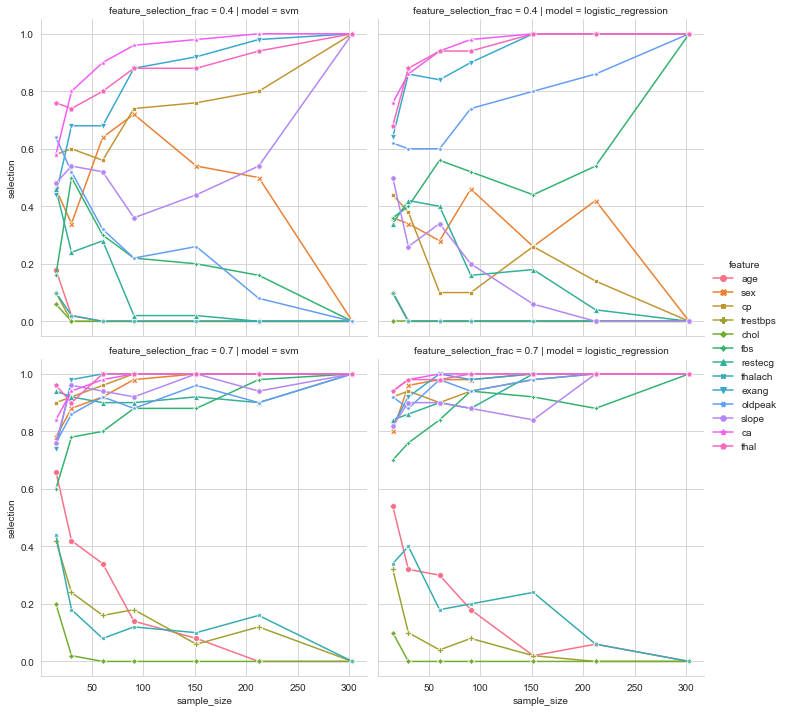

In [9]:
sns.relplot(x='sample_size', data=pivoted_binary, hue='feature', kind='line', y='selection', ci=95, row='feature_selection_frac', col='model', style='feature', markers=True, dashes=False)
plt.show()

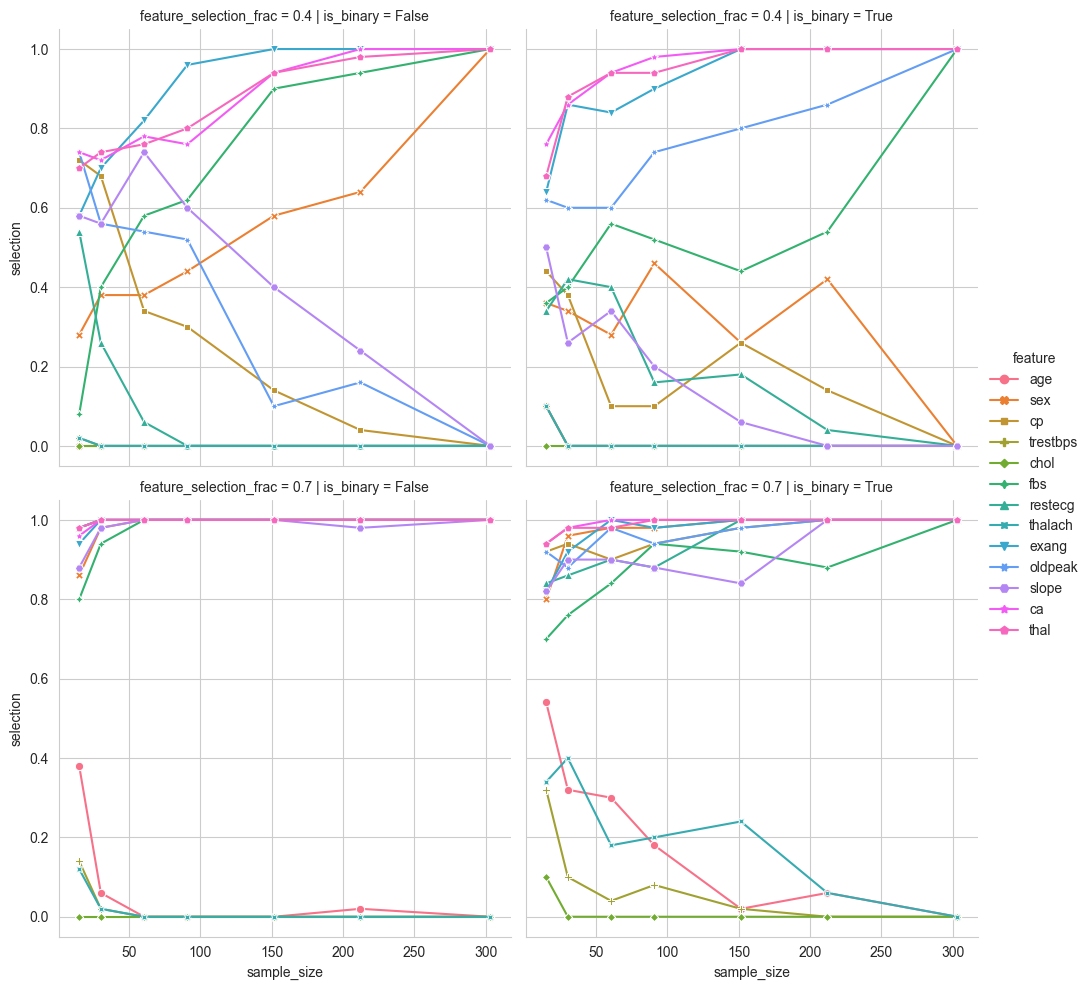

In [10]:
sns.relplot(x='sample_size', data=pivoted_lr, hue='feature', kind='line', y='selection', ci=95, row='feature_selection_frac', col='is_binary', style='feature', markers=True, dashes=False)
plt.show()

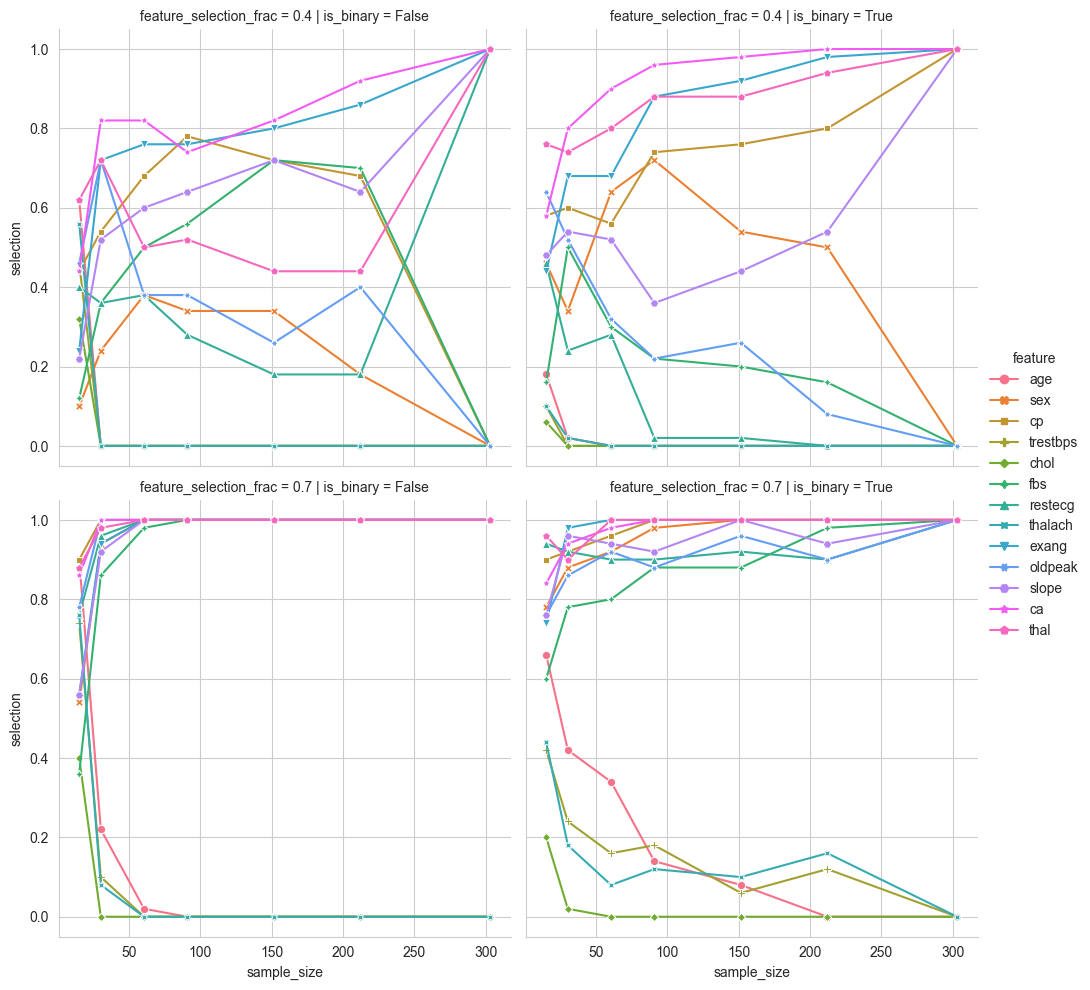

In [11]:
sns.relplot(x='sample_size', data=pivoted_svm, hue='feature', kind='line', y='selection', ci=95, row='feature_selection_frac', col='is_binary', style='feature', markers=True, dashes=False)
plt.show()

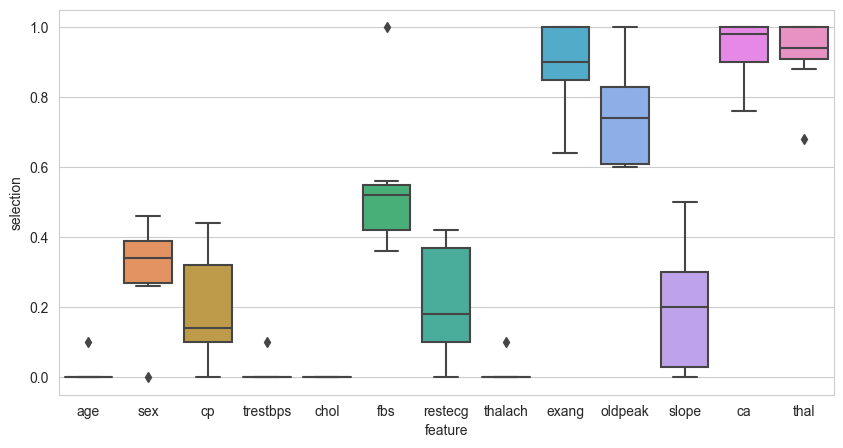

In [12]:
plt.figure(figsize=(10,5))
pivoted_lr_4_binary = pivoted_lr[(pivoted_lr['feature_selection_frac'] == 0.4) & (pivoted_lr['is_binary'] == True)]
sns.boxplot(x='feature', y='selection', data=pivoted_lr_4_binary)
plt.show()

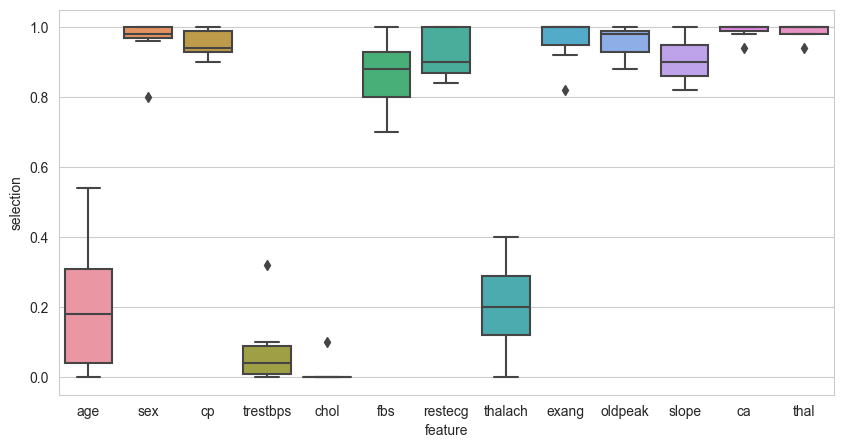

In [13]:
plt.figure(figsize=(10,5))
pivoted_lr_7_binary = pivoted_lr[(pivoted_lr['feature_selection_frac'] == 0.7) & (pivoted_lr['is_binary'] == True)]
sns.boxplot(x='feature', y='selection', data=pivoted_lr_7_binary)
plt.show()

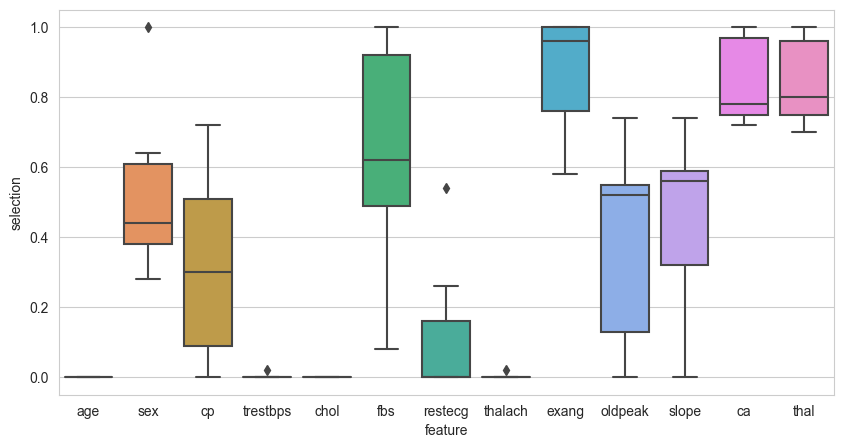

In [14]:
plt.figure(figsize=(10,5))
pivoted_lr_4_non_binary = pivoted_lr[(pivoted_lr['feature_selection_frac'] == 0.4) & (pivoted_lr['is_binary'] == False)]
sns.boxplot(x='feature', y='selection', data=pivoted_lr_4_non_binary)
plt.show()

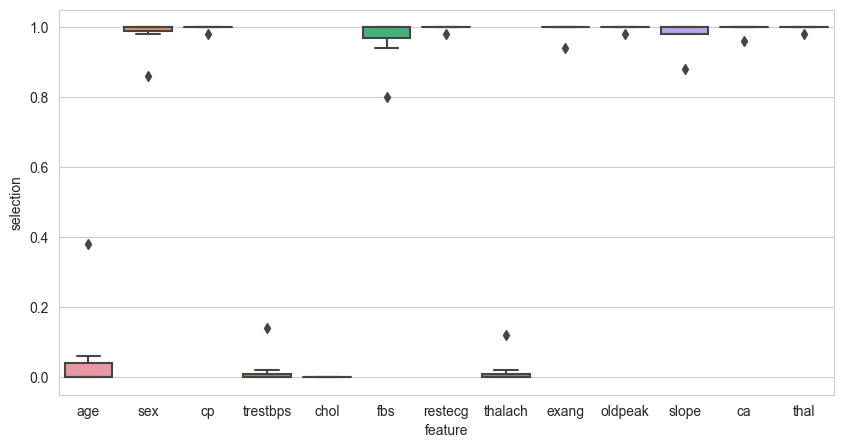

In [15]:
plt.figure(figsize=(10,5))
pivoted_lr_7_non_binary = pivoted_lr[(pivoted_lr['feature_selection_frac'] == 0.7) & (pivoted_lr['is_binary'] == False)]
sns.boxplot(x='feature', y='selection', data=pivoted_lr_7_non_binary)
plt.show()

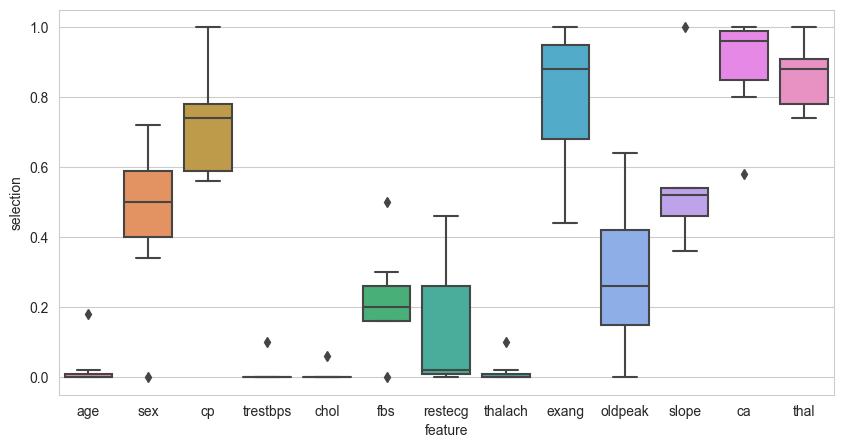

In [16]:
plt.figure(figsize=(10,5))
pivoted_svm_4_binary = pivoted_svm[(pivoted_svm['feature_selection_frac'] == 0.4) & (pivoted_svm['is_binary'] == True)]
sns.boxplot(x='feature', y='selection', data=pivoted_svm_4_binary)
plt.show()

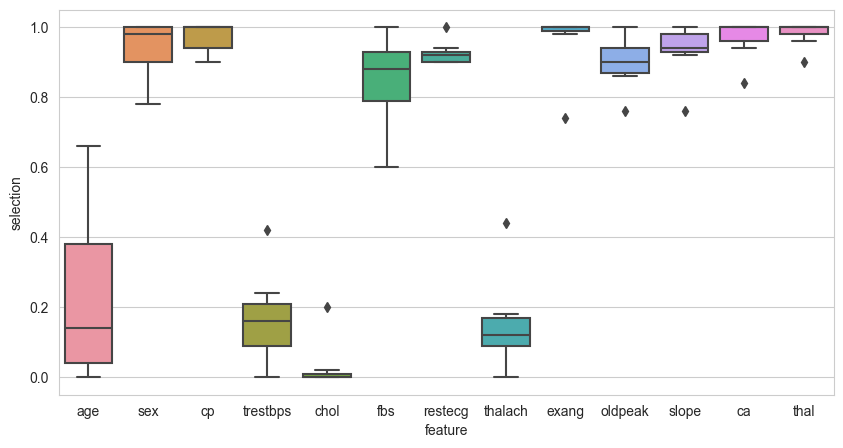

In [17]:
plt.figure(figsize=(10,5))
pivoted_svm_7_binary = pivoted_svm[(pivoted_svm['feature_selection_frac'] == 0.7) & (pivoted_svm['is_binary'] == True)]
sns.boxplot(x='feature', y='selection', data=pivoted_svm_7_binary)
plt.show()

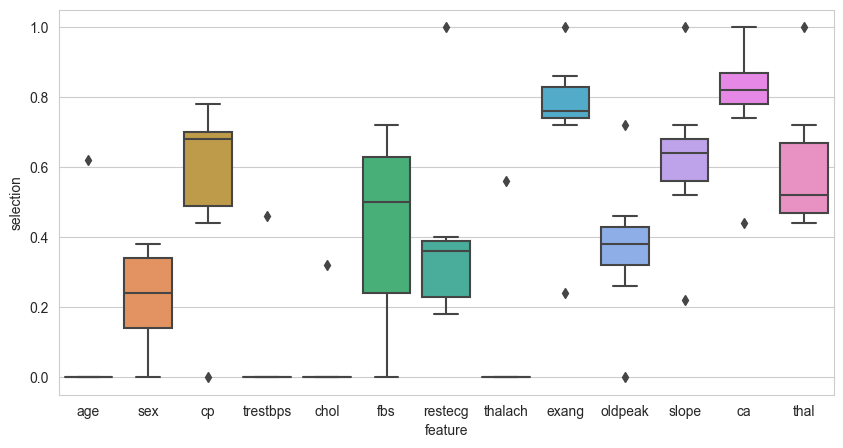

In [18]:
plt.figure(figsize=(10,5))
pivoted_svm_4_non_binary = pivoted_svm[(pivoted_svm['feature_selection_frac'] == 0.4) & (pivoted_svm['is_binary'] == False)]
sns.boxplot(x='feature', y='selection', data=pivoted_svm_4_non_binary)
plt.show()

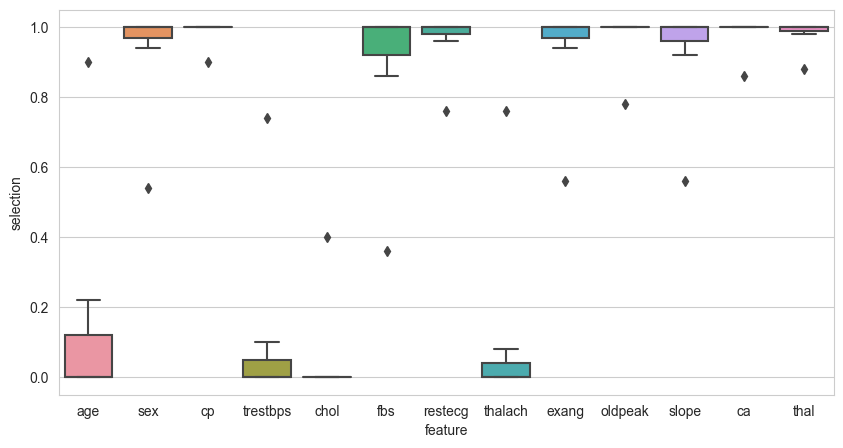

In [19]:
plt.figure(figsize=(10,5))
pivoted_svm_7_non_binary = pivoted_svm[(pivoted_svm['feature_selection_frac'] == 0.7) & (pivoted_svm['is_binary'] == False)]
sns.boxplot(x='feature', y='selection', data=pivoted_svm_7_non_binary)
plt.show()